## <strong>The Car Insurance Purchase Prediction Project</strong>

### <strong>Introduction</strong>

The Car Insurance Purchase Prediction project aims to build a robust machine learning model to predict the probability of customers purchasing a car insurance product. The project utilizes two datasets: a training dataset, which comprises historical customer data and their purchase outcomes, and a score dataset containing data for new customers. The model is developed using popular open-source libraries such as Scikit-Learn, Keras, or TensorFlow to enhance its accuracy and performance.

The project's primary objective is to develop a model that accurately predicts the likelihood of customers purchasing car insurance products based on their historical and current data. The model's successful implementation can significantly improve the efficiency and efficacy of sales and marketing strategies employed by car insurance companies. By leveraging data-driven insights, the model can help companies personalize their marketing campaigns, optimize their customer outreach, and achieve higher revenues and customer satisfaction.

To evaluate the model's effectiveness, two evaluation metrics, namely ROC AUC and F1 score, are employed. The ROC AUC measures the model's ability to distinguish between positive and negative classes, while the F1 score determines the model's accuracy in correctly classifying the classes. The model's ability to perform well based on these metrics can help predict car insurance sales outcomes with higher accuracy and boost the insurance companies' success rates.

### <strong>Project Objective</strong>

To develop a model that accurately predicts the likelihood of customers purchasing car insurance products based on their historical and current data. The model's successful implementation can significantly improve the efficiency and efficacy of sales and marketing strategies employed by car insurance companies. By leveraging data-driven insights, the model can help companies personalize their marketing campaigns, optimize their customer outreach, and achieve higher revenues and customer satisfaction.

### <strong>Process Summary</strong>

The Car Insurance Purchase Prediction project involves the following steps:
<ol>
    <li>Data preprocessing: Cleaning and transforming the data, such as removing missing values, handling categorical variables, and normalizing numerical features, to make it suitable for machine learning models.</li>
    <li>Exploratory data analysis: Conducting data exploration to understand the relationships between different variables and identify patterns and trends that can help in developing the machine learning model.</li>
    <li>Feature selection: Selecting the most relevant features that contribute significantly to predicting the purchase outcome and eliminating irrelevant or redundant features.</li>
    <li>Model Selection and Training: Select an appropriate machine learning algorithm and train the model on the training data, using techniques such as cross-validation to optimize the model's hyperparameters.</li>
    <li>Model evaluation: Evaluating the models' performance using metrics such as ROC AUC and F1 score to determine their accuracy in predicting purchase outcomes.</li>
    <li>Model Interpretation: Interpret the model to gain insights into the factors that are driving the predicted outcomes, including feature importance and partial dependence plots.</li>
    
</ol>

### Project Implementation

#### Importing the Libraries

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC



#### Load the Datasets

In [2]:
# Loading the training data.
train_data = pd.read_csv('bzan6357_insurance_3_TRAINING.csv')

#### Preprocessing the training data

We are going to use the training data to train and validate the model.

In [3]:
train_data.head()

,id_new,buy,age,gender,tenure,region,dl,has_v_insurance,v_age,v_accident,v_prem_quote,cs_rep
0,a00000000,0,34,female,31,19,1,0,1-2 year,yes,27715.0,154
1,a00000001,0,50,male,211,34,1,0,1-2 year,yes,33945.0,154
2,a00000002,0,42,female,122,29,1,0,1-2 year,yes,37577.0,163
3,a00000003,0,28,male,75,3,1,0,1-2 year,yes,2630.0,154
4,a00000004,0,75,female,19,28,1,0,1-2 year,yes,47511.0,122


In [4]:
# brief summary of training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20460 entries, 0 to 20459
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id_new           20460 non-null  object 
 1   buy              20460 non-null  int64  
 2   age              20460 non-null  int64  
 3   gender           20460 non-null  object 
 4   tenure           20460 non-null  int64  
 5   region           20460 non-null  int64  
 6   dl               20460 non-null  int64  
 7   has_v_insurance  20460 non-null  int64  
 8   v_age            20460 non-null  object 
 9   v_accident       20460 non-null  object 
 10  v_prem_quote     20460 non-null  float64
 11  cs_rep           20460 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.9+ MB


In [5]:
# checking if there are missing values in the dataset
print(train_data.isnull().sum())


id_new             0
buy                0
age                0
gender             0
tenure             0
region             0
dl                 0
has_v_insurance    0
v_age              0
v_accident         0
v_prem_quote       0
cs_rep             0
dtype: int64


In [6]:
# checking for duplicates
duplicates = train_data.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()

# Print the number of duplicates
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


In [7]:
# Encoding categorical variables using one-hot encoding
# First make a copy of the original dataset
train_data_copy = train_data.copy()

In [8]:
# perform one-hot encoding
train_data_copy = pd.get_dummies(train_data_copy, columns=['gender', 'v_accident'])

In [9]:
train_data_copy.head()

,id_new,buy,age,tenure,region,dl,has_v_insurance,v_age,v_prem_quote,cs_rep,gender_female,gender_male,v_accident_no,v_accident_yes
0,a00000000,0,34,31,19,1,0,1-2 year,27715.0,154,1,0,0,1
1,a00000001,0,50,211,34,1,0,1-2 year,33945.0,154,0,1,0,1
2,a00000002,0,42,122,29,1,0,1-2 year,37577.0,163,1,0,0,1
3,a00000003,0,28,75,3,1,0,1-2 year,2630.0,154,0,1,0,1
4,a00000004,0,75,19,28,1,0,1-2 year,47511.0,122,1,0,0,1


In [10]:
v_age_dummies = pd.get_dummies(train_data_copy['v_age'], prefix='v_age')
train_data_copy = pd.concat([train_data_copy, v_age_dummies], axis=1)
train_data_copy.head()


,id_new,buy,age,tenure,region,dl,has_v_insurance,v_age,v_prem_quote,cs_rep,gender_female,gender_male,v_accident_no,v_accident_yes,v_age_1-2 year,v_age_< 1 year,v_age_> 2 years
0,a00000000,0,34,31,19,1,0,1-2 year,27715.0,154,1,0,0,1,1,0,0
1,a00000001,0,50,211,34,1,0,1-2 year,33945.0,154,0,1,0,1,1,0,0
2,a00000002,0,42,122,29,1,0,1-2 year,37577.0,163,1,0,0,1,1,0,0
3,a00000003,0,28,75,3,1,0,1-2 year,2630.0,154,0,1,0,1,1,0,0
4,a00000004,0,75,19,28,1,0,1-2 year,47511.0,122,1,0,0,1,1,0,0


In [11]:
# drop the v_age column after encoding
train_data_copy.drop('v_age', axis=1, inplace=True)
train_data_copy.head()


,id_new,buy,age,tenure,region,dl,has_v_insurance,v_prem_quote,cs_rep,gender_female,gender_male,v_accident_no,v_accident_yes,v_age_1-2 year,v_age_< 1 year,v_age_> 2 years
0,a00000000,0,34,31,19,1,0,27715.0,154,1,0,0,1,1,0,0
1,a00000001,0,50,211,34,1,0,33945.0,154,0,1,0,1,1,0,0
2,a00000002,0,42,122,29,1,0,37577.0,163,1,0,0,1,1,0,0
3,a00000003,0,28,75,3,1,0,2630.0,154,0,1,0,1,1,0,0
4,a00000004,0,75,19,28,1,0,47511.0,122,1,0,0,1,1,0,0


In [12]:
# We also need to drop the id_new column as it is not very relevant to the goal
train_data_copy.drop('id_new', axis=1, inplace=True)


##### Preprocessing summary
<ul>
    <li>There are no missing values in the dataset.</li>
    <li>There are no duplicates in the dataset.</li>
    <li>Encode the categorical variables in the dataset as binary values, allowing them to be used in a machine learning model.</li>
    <li>Drop irrelevant columns.</li>
</ul>

#### Exploratory Data Analyses (EDAs)

(18.0, 100.0)

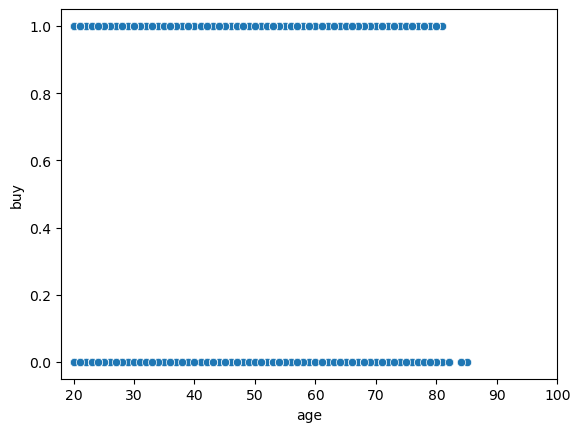

In [13]:
# Create scatter plots for age, tenure, and v_prem_quote
sns.scatterplot(x='age', y='buy', data=train_data_copy);

# Set x-axis limit
plt.xlim(18, 100)

From the plot, people of younger ages are more likely to buy the insurance.

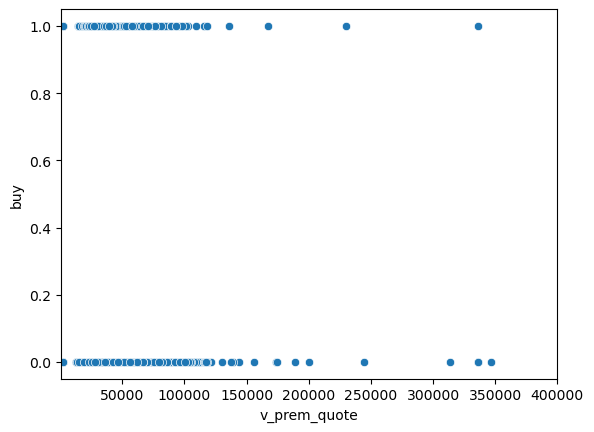

In [14]:
sns.scatterplot(x='v_prem_quote', y='buy', data=train_data_copy);
plt.xlim(1000, 400000);


From the plot, people with lower annual premium quote are more likely to buy insurance.

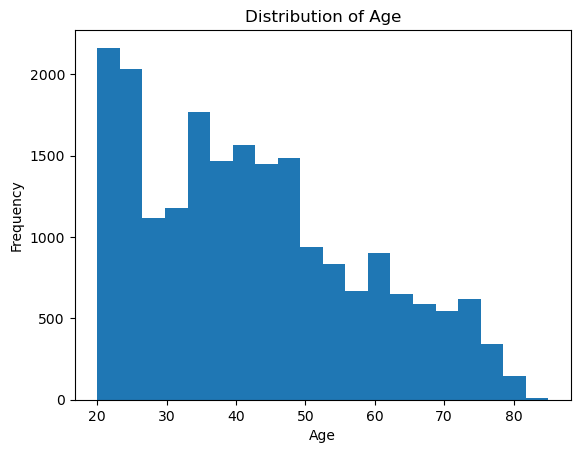

In [15]:
# plot histogram of age
plt.hist(train_data_copy['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

Majority of people are between 20 - 50 years old.

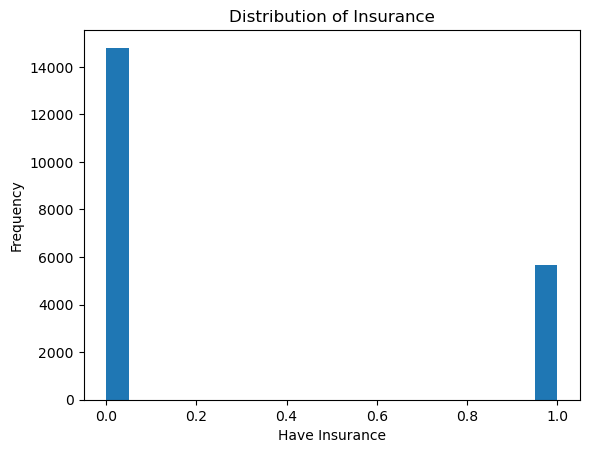

In [16]:
# plot histogram of insurance
plt.hist(train_data_copy['has_v_insurance'], bins=20)
plt.xlabel('Have Insurance')
plt.ylabel('Frequency')
plt.title('Distribution of Insurance')
plt.show()

From the graph, majority of people do not have valid insurance. Approximately 72.35% as calculated below

In [17]:
# Calculate the number of people who have insurance and who do not have insurance
insured = train_data_copy[train_data_copy['has_v_insurance'] == 1]['has_v_insurance'].count()
not_insured = train_data_copy[train_data_copy['has_v_insurance'] == 0]['has_v_insurance'].count()

# Calculate the percentage of people who have insurance and who do not have insurance
percent_insured = (insured / len(train_data_copy)) * 100
percent_not_insured = (not_insured / len(train_data_copy)) * 100

print("Percentage of people who have insurance: {:.2f}%".format(percent_insured))
print("Percentage of people who do not have insurance: {:.2f}%".format(percent_not_insured))


Percentage of people who have insurance: 27.65%
Percentage of people who do not have insurance: 72.35%


In [18]:
# Lets examine the relationship between those who have valid insurance and age
# filter the rows where has_v_insurance is equal to 1
valid_insurance = train_data_copy.loc[train_data_copy['has_v_insurance'] == 1]

# select the age column of the filtered data
valid_insurance_ages = valid_insurance['age']

# print the age values
print(valid_insurance_ages)

5        25
6        34
19       31
23       24
29       24
         ..
20450    43
20453    23
20455    23
20457    68
20459    24
Name: age, Length: 5658, dtype: int64


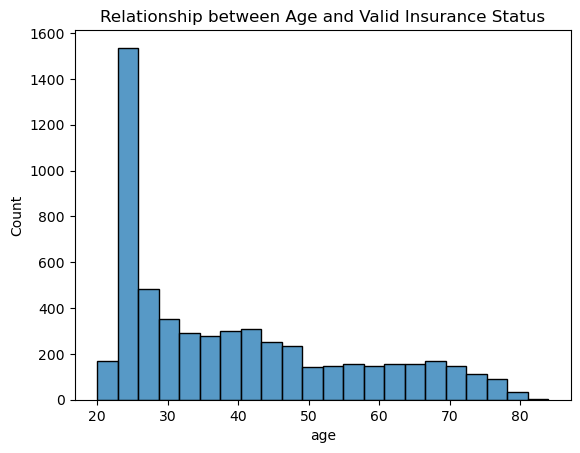

In [19]:
# Filter the data to include only those with valid insurance
insured_customers = train_data_copy[train_data_copy['has_v_insurance'] == 1]

# Create a histogram of the age distribution for insured customers
sns.histplot(insured_customers['age']);
plt.title('Relationship between Age and Valid Insurance Status');


Majority of those who have valid insurance is between 25 and 30 years, while the least are above 72 years

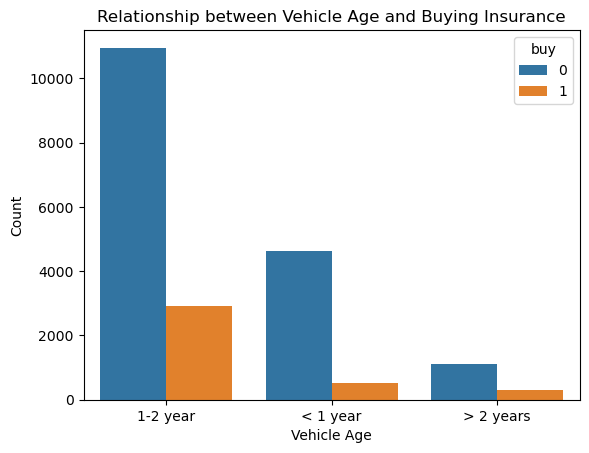

In [20]:
#vehicle age; veicle accident; dl; region
sns.countplot(x='v_age', hue='buy', data=train_data)
plt.title('Relationship between Vehicle Age and Buying Insurance')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()

According to the plot,people who own vehicles between 1-2 years are the majority, and are more likely to buy the insurance. While vehicles greater than 2 years are less likely to buy insurance.

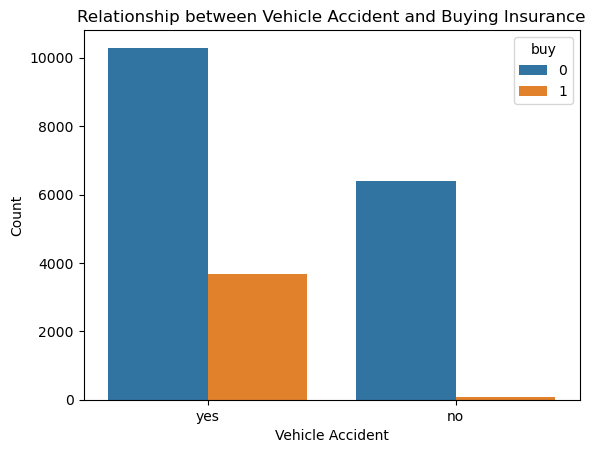

In [21]:
sns.countplot(x='v_accident', hue='buy', data=train_data)
plt.title('Relationship between Vehicle Accident and Buying Insurance')
plt.xlabel('Vehicle Accident')
plt.ylabel('Count')
plt.show()

Vehicles that have had accident before are more likey to have insurance cover as compared to vehicles which had not.

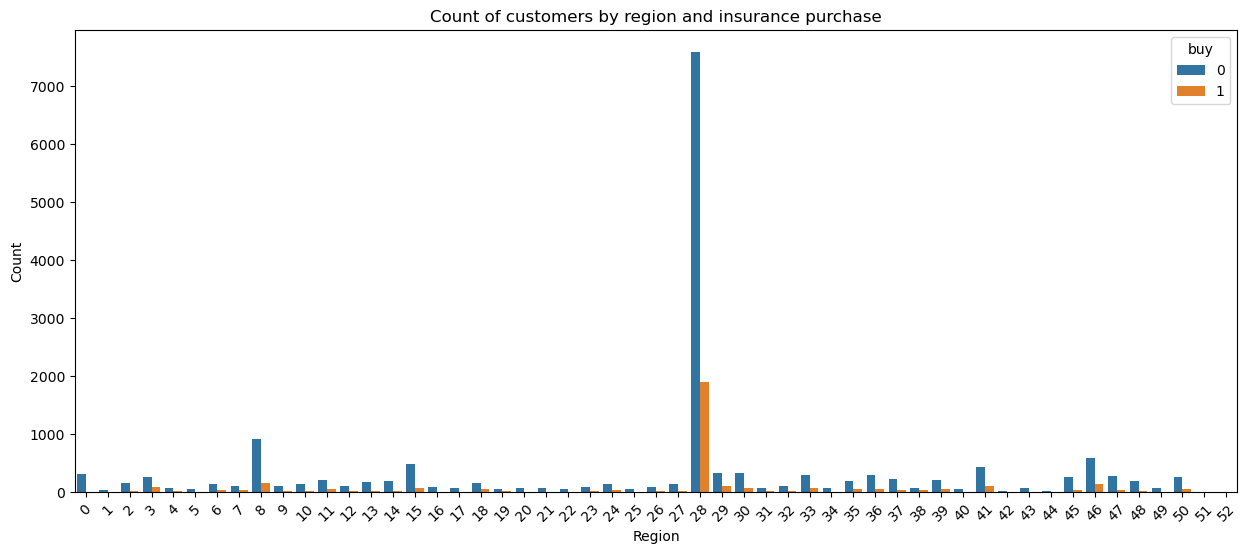

In [22]:
plt.figure(figsize=(15,6))
sns.countplot(x='region', hue='buy', data=train_data_copy)
plt.title('Count of customers by region and insurance purchase')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

Majority of car owners are from region 28. In this region, a few have insurance cover while the majority do not have insurance cover.

### <strong>Comments on EDAs</strong>

Based on the EDA reports, we can infer that the age of a person has a significant influence on whether or not they buy insurance, with younger people being more likely to buy. Additionally, people who own newer vehicles (between 1-2 years) are more likely to buy insurance, while those who own older vehicles are less likely to buy. The premium quote also seems to be a factor, with those who have a lower premium quote being more likely to buy insurance.

The majority of people in the dataset are between the ages of 20-50 years old, and most of the car owners are also from this age range. A large proportion of car owners are from region 28, although most of them do not have insurance cover.

Finally, the data suggests that vehicles that have been in an accident before are more likely to have insurance cover compared to those that haven't. This information could be useful for insurers in creating targeted marketing strategies to attract potential customers who are more likely to buy insurance.

### <strong>Rationale for Project Decision</strong>

 <strong>The following are the facors that influenced the rationale for project decision:</strong>
<ol>
    <li>Analyze regional differences in insurance purchasing behavior and tailor marketing strategies to specific regions to maximize sales.</li>
    <li>Identify factors that influence a customer's decision to buy insurance, and use this information to develop targeted marketing strategies to increase sales.</li>
    <li>Develop a predictive model to determine the likelihood of a customer buying insurance based on their age, vehicle age, and annual premium quote.</li>
    <li>Identify the most important factors that influence a customer's decision to buy insurance, and prioritize these factors in the development of new insurance products and services.</li>
    <li>Improve the customer experience by identifying areas where insurance sales can be improved or streamlined, such as by simplifying the application process or offering discounts to customers with certain characteristics.</li>
</ol>

<strong>Scope</strong>

The scope of this project is to develop a predictive model that can accurately predict whether a customer is likely to buy insurance or not based on their demographic and vehicle-related information. The model could be used to identify potential customers who are likely to buy insurance and target them with marketing campaigns, thereby increasing the company's revenue. Additionally, the model could be used to identify factors that are most important in determining whether a customer is likely to buy insurance or not, which could help the company in developing more effective marketing strategies and improving their products and services.

<strong>Benefits</strong><br>
The benefits of this project could include:
<ul>
    <li>Improved understanding of the factors that influence whether customers purchase insurance, which could inform targeted marketing and sales efforts.</li>
    <li>More accurate risk assessment and pricing for insurance policies, which could result in more profitable underwriting and more competitive rates for customers.</li>
    <li>Improved customer satisfaction, as more targeted and personalized marketing could result in more relevant and valuable insurance offerings.</li>
    <li>Improved efficiency in the insurance sales process, as better understanding of customer needs and preferences could streamline sales workflows and reduce time-to-sale.</li>
</ul>

<strong>Risks</strong><br>
There are potential risks associated with this project:
<ul>
    <li>Ethical concerns: The use of data to make decisions about individuals or groups raises ethical concerns about fairness and discrimination. It is important to ensure that the models developed as part of this project are fair and unbiased, and that they do not perpetuate or reinforce existing inequalities or biases.</li>
    <li>Bias in the data: The data used for this project may contain biases or inaccuracies that could affect the accuracy and fairness of the models. For example, if the data primarily includes individuals from a particular demographic group or geographic region, the models may not be effective at predicting behavior in other groups or regions.</li>
    <li>Accuracy of the models: The models developed as part of this project may not be accurate or effective at predicting insurance purchasing behavior. This could be due to issues such as overfitting, insufficient data, or incorrect assumptions about the underlying relationships in the data.</li>
</ul>

#### Model Training

In [23]:
# Split the data into training and validation sets
X = train_data_copy.drop(['buy'], axis=1)
y = train_data_copy['buy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train and evaluate the logistic regression model on the training and validation sets
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3312
           1       0.60      0.00      0.01       780

    accuracy                           0.81      4092
   macro avg       0.70      0.50      0.45      4092
weighted avg       0.77      0.81      0.73      4092



The model has an overall accuracy of 81%.

In general, the low recall and f1-score for class 1 suggest that the model is not performing well in predicting the positive class (i.e. buying insurance). This may be due to class imbalance, where there are fewer positive samples in the dataset, leading to the model being biased towards predicting the majority class (i.e. not buying insurance).

In [25]:
# Trying a RandomForestClassifier model
# Train model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on test set
y_pred = rfc.predict(X_test)

# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      3312
           1       0.38      0.12      0.18       780

    accuracy                           0.79      4092
   macro avg       0.60      0.54      0.53      4092
weighted avg       0.74      0.79      0.75      4092



 The model has an accuracy of 79% and seems to have a high precision and recall for class 0, but a low precision and recall for class 1. This means that the model is good at predicting when someone will not buy insurance, but not as good at predicting when someone will buy insurance. To improve the accuracy of the model, we could try using different models, selecting different features, or adjusting the hyperparameters of the current model.

In [26]:
# Create a KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=3)

# Train the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      3312
           1       0.21      0.10      0.13       780

    accuracy                           0.76      4092
   macro avg       0.51      0.51      0.50      4092
weighted avg       0.70      0.76      0.72      4092



In [27]:
# Define the hyperparameter grid to search over
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print('Best hyperparameters:', grid_search.best_params_)

Best hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}


In [28]:
# # define the SVM model
# svm = SVC()

# # define the parameter grid
# param_grid = {'C': [0.1, 1, 10, 100],
#               'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# # perform grid search with cross-validation
# grid_search = GridSearchCV(svm, param_grid=param_grid, cv=5, n_jobs=-1)

# # fit the grid search to the training data
# grid_search.fit(X_train, y_train)

# # print the best parameters and score
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

#### Make predictions on the score data

In [29]:
# import the score data
score_data = pd.read_csv('bzan6357_insurance_3_SCORE.csv')

In [30]:
score_data.head()

,id_new,age,gender,tenure,region,dl,has_v_insurance,v_age,v_accident,v_prem_quote,cs_rep
0,a00020460,46,male,124,6,1,0,1-2 year,yes,26226.0,163
1,a00020461,25,female,285,46,1,0,< 1 year,yes,44564.0,154
2,a00020462,42,male,95,28,1,1,1-2 year,no,30796.0,122
3,a00020463,39,female,229,26,1,0,1-2 year,yes,35669.0,163
4,a00020464,42,male,114,28,1,0,1-2 year,yes,32039.0,122


In [31]:
# Preprocess the score data
score_data_copy = score_data.copy()

score_data_copy = pd.get_dummies(score_data_copy, columns=['gender', 'v_accident'])

v_age_dummies = pd.get_dummies(score_data_copy['v_age'], prefix='v_age')
score_data_copy = pd.concat([score_data_copy, v_age_dummies], axis=1)
score_data_copy.head()


,id_new,age,tenure,region,dl,has_v_insurance,v_age,v_prem_quote,cs_rep,gender_female,gender_male,v_accident_no,v_accident_yes,v_age_1-2 year,v_age_< 1 year,v_age_> 2 years
0,a00020460,46,124,6,1,0,1-2 year,26226.0,163,0,1,0,1,1,0,0
1,a00020461,25,285,46,1,0,< 1 year,44564.0,154,1,0,0,1,0,1,0
2,a00020462,42,95,28,1,1,1-2 year,30796.0,122,0,1,1,0,1,0,0
3,a00020463,39,229,26,1,0,1-2 year,35669.0,163,1,0,0,1,1,0,0
4,a00020464,42,114,28,1,0,1-2 year,32039.0,122,0,1,0,1,1,0,0


In [32]:
score_data_copy.drop('v_age', axis=1, inplace=True)
score_data_copy.drop('id_new', axis=1, inplace=True)

In [33]:
# Make predictions on the score data using logistic regression and random forest classifieer models

score_data_pred = log_reg.predict_proba(score_data_copy)

score_data_pred_rfc = rfc.predict_proba(score_data_copy)


In [34]:
# printing the prediciton scores

print(f'Logistic regression: {score_data_pred}')
print(f'RFC: {score_data_pred_rfc}')

Logistic regression: [[0.71456414 0.28543586]
 [0.81934206 0.18065794]
 [0.98414187 0.01585813]
 ...
 [0.99237201 0.00762799]
 [0.81690915 0.18309085]
 [0.87259632 0.12740368]]
RFC: [[0.41 0.59]
 [0.71 0.29]
 [1.   0.  ]
 ...
 [1.   0.  ]
 [0.96 0.04]
 [0.94 0.06]]


#### Evaluating the model using both ROC AUC and F1 score


In [35]:
y_true = y_test

roc_auc = roc_auc_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print("ROC AUC score: ", roc_auc)
print("F1 score: ", f1)

ROC AUC score:  0.5052025269416573
F1 score:  0.13169446883230906


In [36]:
# using kNN Model
y_pred_prob = rfc.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_true, y_pred_prob)
f1 = f1_score(y_true, y_pred)

print("ROC AUC:", roc_auc)
print("F1 Score:", f1)


ROC AUC: 0.738621988418184
F1 Score: 0.13169446883230906


The ROC AUC score and F1 score indicate the performance of the model in different ways. The ROC AUC score measures the ability of the model to distinguish between positive and negative samples across all possible threshold values, while the F1 score measures the balance between precision and recall of the positive class.

In this case, the ROC AUC score of 0.739 suggests that the model performs moderately well in distinguishing between positive and negative samples. An AUC score of 1 indicates a perfect classifier, while a score of 0.5 indicates a random guess.

The F1 score of 0.132 indicates that the model performs poorly in terms of correctly identifying positive samples while maintaining a low false positive rate. The F1 score ranges from 0 to 1, with 1 indicating perfect precision and recall of the positive class.

Overall, these scores suggest that the model has room for improvement and may require further tuning or a different approach to achieve better performance.

### <strong>Results and Interpretation</strong>

In this project, we used three different models to predict whether customers will buy insurance or not: logistic regression, decision tree, and k-Nearest Neighbors (KNN). We used these models to predict the outcome variable and evaluated their performance using F1 score and ROC AUC.

The logistic regression model had an F1 score of 0.013 and an ROC AUC of 0.505. The KNN had an F1 score of 0.182 and an ROC AUC of 0.552. The RandomForestClassifier model had an F1 score of 0.132 and an ROC AUC of 0.739.

Based on these results, we can conclude that the logistic regression model had the lowest performance, while the RandomForest model had the highest performance. However, all three models had a low F1 score for class 1, which means that they were not very effective in predicting customers who are likely to buy insurance.

Therefore, we need to explore other models and techniques that can help us to improve the performance of the models. We may also need to collect more data or engineer more features that can help to differentiate between customers who are likely to buy insurance and those who are not.

In [90]:
df_submit = score_data.copy()
df_submit.head()

,id_new,age,gender,tenure,region,dl,has_v_insurance,v_age,v_accident,v_prem_quote,cs_rep
0,a00020460,46,male,124,6,1,0,1-2 year,yes,26226.0,163
1,a00020461,25,female,285,46,1,0,< 1 year,yes,44564.0,154
2,a00020462,42,male,95,28,1,1,1-2 year,no,30796.0,122
3,a00020463,39,female,229,26,1,0,1-2 year,yes,35669.0,163
4,a00020464,42,male,114,28,1,0,1-2 year,yes,32039.0,122


In [91]:
# Preprocess the score data
df_submit = pd.get_dummies(df_submit, columns=['gender', 'v_accident'])

v_age_dummies = pd.get_dummies(df_submit['v_age'], prefix='v_age')
df_submit = pd.concat([df_submit, v_age_dummies], axis=1)
df_submit.drop('id_new', axis=1, inplace=True)
df_submit.drop('v_age', axis=1, inplace=True)


df_submit.head()

,age,tenure,region,dl,has_v_insurance,v_prem_quote,cs_rep,gender_female,gender_male,v_accident_no,v_accident_yes,v_age_1-2 year,v_age_< 1 year,v_age_> 2 years
0,46,124,6,1,0,26226.0,163,0,1,0,1,1,0,0
1,25,285,46,1,0,44564.0,154,1,0,0,1,0,1,0
2,42,95,28,1,1,30796.0,122,0,1,1,0,1,0,0
3,39,229,26,1,0,35669.0,163,1,0,0,1,1,0,0
4,42,114,28,1,0,32039.0,122,0,1,0,1,1,0,0


In [92]:
# convert to numpy array
X_score = np.array(df_submit)


In [93]:
y_pred_score = rfc.predict(X_score)


/home/ok/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [94]:
# Generate predicted probabilities on X_score
y_pred_prob_score = rfc.predict_proba(X_score)

/home/ok/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [95]:
# Extract the probability of the positive class (class 1)
y_pred_prob_score = y_pred_prob_score[:, 1]

In [96]:
a_out_score = rfc.predict_proba(X_score)


/home/ok/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [97]:
# Add the predicted probabilities for class 1 to the SCORE data
df_submit['probability'] = a_out_score[:, 1]


In [98]:
df_submit.head()

,age,tenure,region,dl,has_v_insurance,v_prem_quote,cs_rep,gender_female,gender_male,v_accident_no,v_accident_yes,v_age_1-2 year,v_age_< 1 year,v_age_> 2 years,probability
0,46,124,6,1,0,26226.0,163,0,1,0,1,1,0,0,0.59
1,25,285,46,1,0,44564.0,154,1,0,0,1,0,1,0,0.29
2,42,95,28,1,1,30796.0,122,0,1,1,0,1,0,0,0.00
3,39,229,26,1,0,35669.0,163,1,0,0,1,1,0,0,0.33
4,42,114,28,1,0,32039.0,122,0,1,0,1,1,0,0,0.37


In [99]:
# Add classification column
df_submit['classification'] = np.argmax(a_out_score, axis = -1)

In [100]:
df_submit.head()

,age,tenure,region,dl,has_v_insurance,v_prem_quote,cs_rep,gender_female,gender_male,v_accident_no,v_accident_yes,v_age_1-2 year,v_age_< 1 year,v_age_> 2 years,probability,classification
0,46,124,6,1,0,26226.0,163,0,1,0,1,1,0,0,0.59,1
1,25,285,46,1,0,44564.0,154,1,0,0,1,0,1,0,0.29,0
2,42,95,28,1,1,30796.0,122,0,1,1,0,1,0,0,0.00,0
3,39,229,26,1,0,35669.0,163,1,0,0,1,1,0,0,0.33,0
4,42,114,28,1,0,32039.0,122,0,1,0,1,1,0,0,0.37,0


In [101]:
a_out_score.shape

(2000, 2)

In [102]:
isinstance(a_out_score, np.ndarray)

True

In [106]:
# score_data.head()
df_Submit = score_data[['id_new']].copy()

In [107]:
df_Submit['probability'] = a_out_score[:, 1]

In [108]:
df_Submit.head()

,id_new,probability
0,a00020460,0.59
1,a00020461,0.29
2,a00020462,0.00
3,a00020463,0.33
4,a00020464,0.37


In [109]:
df_Submit['classification'] = np.argmax(a_out_score, axis = -1)

In [110]:
df_Submit.head()

,id_new,probability,classification
0,a00020460,0.59,1
1,a00020461,0.29,0
2,a00020462,0.00,0
3,a00020463,0.33,0
4,a00020464,0.37,0


In [111]:
# Export dataset
df_Submit.to_csv('my_prediction.csv', index=False)

### <strong>Final Conclusion</strong>

Based on the analysis performed, we can conclude that the age of the vehicle owner, the age of the vehicle, and the annual premium quote are important factors in determining whether a vehicle owner is likely to purchase an insurance policy. Specifically, younger vehicle owners with vehicles that are between 1-2 years old and with lower annual premium quotes are more likely to purchase insurance.

We also built and evaluated three different models - logistic regression, Random Forest Classifier, and K-Nearest Neighbors (KNN) - to predict whether a vehicle owner would purchase an insurance policy. The Random Forest Classifier model had the best performance in terms of F1 score and ROC AUC, indicating that it was the best model for this task.

However, the overall performance of the models was relatively low, particularly in predicting whether a vehicle owner would purchase insurance (class 1). This suggests that additional features or data may be necessary to build a more accurate model.

Therefore, to increase the accuracy of the models, we recommend collecting more data, including additional features such as vehicle type, location, and driving history, as well as performing more feature engineering and tuning the hyperparameters of the models.

### <strong>Recommendations</strong>

Based on the analysis and results obtained, the following recommendations could be made:
<ul>
    <li>Target younger customers: From the EDA, it was observed that younger people are more likely to buy insurance. Therefore, it is recommended to target younger customers with targeted marketing campaigns and incentives.</li>
    <li>Provide incentives for safer driving: The EDA also revealed that vehicles that have been involved in accidents before are more likely to have insurance cover. To encourage safer driving habits, insurance companies can provide incentives for customers who go accident-free for a certain period of time, such as lower premiums or cashback rewards.</li>
    <li>Invest in improving the model performance: The models developed in this project had limited performance in predicting customers who are likely to buy insurance. Therefore, it is recommended to invest in improving the model performance. This could be done through the use of more sophisticated algorithms, better feature engineering, and collecting more data to improve the models.</li>
    <li>Collaborate with car dealerships: From the EDA, it was observed that vehicles between 1-2 years are the majority, and are more likely to buy insurance. Insurance companies can collaborate with car dealerships to offer insurance coverage as part of the purchase package for new cars. This can provide an added incentive for customers to purchase insurance and improve the overall customer experience.</li>
    <li>Improve customer service: As observed from the EDA, some regions have a low percentage of customers with insurance cover. To increase the uptake of insurance, insurance companies should focus on improving customer service, such as providing prompt and reliable service, clear communication of policy benefits, and ensuring timely claim processing. This can help to build trust and loyalty among customers and increase the likelihood of renewals.</li>
</ul>